In [359]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
from random import random
from math import exp
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [360]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch-summary

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [361]:
import torch 
import torch.nn as nn
from torch.autograd import Variable

import pandas as pd

from sklearn.utils import shuffle
from torchsummary import summary

# Question 1

## Data pre-processing

In [362]:
q1_df = pd.read_csv('abalone.data',names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
q1_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [363]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [364]:
q1_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [365]:
q1_df.loc[:, q1_df.isnull().any()].columns

Index([], dtype='object')

In [366]:
# for i in q1_df.columns:
print("Mean :",q1_df['Rings'].mean())
print("Standard Deviation :",q1_df['Rings'].std())
print(q1_df['Rings'].value_counts())

Mean : 9.933684462532918
Standard Deviation : 3.2241690320681133
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64


In [367]:
q1_df_copy = q1_df.copy()

## Ouput Variable Encoding 

In [368]:
q1_df['Rings'][q1_df['Rings'] < 9] = 0
q1_df['Rings'][q1_df['Rings'] == 9] = 1
q1_df['Rings'][q1_df['Rings'] == 10] = 1
q1_df['Rings'][q1_df['Rings'] > 10] = 2
q1_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [369]:
q1_df['Rings'].value_counts()

2    1447
0    1407
1    1323
Name: Rings, dtype: int64

In [370]:
q1_df = q1_df.sample(frac=1)
q1_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
754,M,0.650,0.515,0.175,1.4805,0.5295,0.2720,0.5250,2
3615,M,0.615,0.475,0.190,1.4335,0.7315,0.3050,0.3285,1
3950,F,0.530,0.425,0.130,0.7170,0.2115,0.1660,0.2550,2
847,F,0.545,0.440,0.135,0.9185,0.4290,0.2015,0.2375,1
1761,M,0.750,0.595,0.205,2.2205,1.0830,0.4210,0.6300,2
...,...,...,...,...,...,...,...,...,...
3891,F,0.560,0.460,0.180,0.9700,0.3420,0.1960,0.3550,2
1823,M,0.730,0.575,0.210,2.0690,0.9285,0.4090,0.6430,2
1052,M,0.765,0.600,0.220,2.3020,1.0070,0.5090,0.6205,2
2188,M,0.470,0.370,0.135,0.5470,0.2220,0.1325,0.1700,2


In [371]:
# q1_df[q1_df['Sex']=='M'] = 0
# q1_df[q1_df['Sex']=='F'] = 1
# q1_df[q1_df['Sex']=='I'] = 2
q1_df['Sex'].replace({'F':0.0, 'M':1.0, 'I':2.0},inplace=True)
q1_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
754,1.0,0.650,0.515,0.175,1.4805,0.5295,0.2720,0.5250,2
3615,1.0,0.615,0.475,0.190,1.4335,0.7315,0.3050,0.3285,1
3950,0.0,0.530,0.425,0.130,0.7170,0.2115,0.1660,0.2550,2
847,0.0,0.545,0.440,0.135,0.9185,0.4290,0.2015,0.2375,1
1761,1.0,0.750,0.595,0.205,2.2205,1.0830,0.4210,0.6300,2
...,...,...,...,...,...,...,...,...,...
3891,0.0,0.560,0.460,0.180,0.9700,0.3420,0.1960,0.3550,2
1823,1.0,0.730,0.575,0.210,2.0690,0.9285,0.4090,0.6430,2
1052,1.0,0.765,0.600,0.220,2.3020,1.0070,0.5090,0.6205,2
2188,1.0,0.470,0.370,0.135,0.5470,0.2220,0.1325,0.1700,2


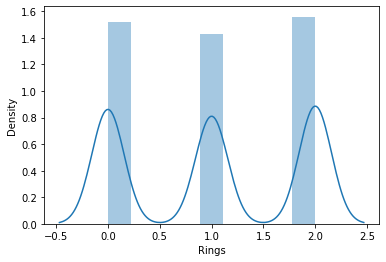

In [372]:
sns.distplot(q1_df['Rings'])

## Train-Test Split

In [373]:
from sklearn.model_selection  import train_test_split
X = q1_df.iloc[:,:-1]
Y = q1_df['Rings']

# Split the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [374]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 1466 to 2668
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2923 non-null   float64
 1   Length          2923 non-null   float64
 2   Diameter        2923 non-null   float64
 3   Height          2923 non-null   float64
 4   Whole weight    2923 non-null   float64
 5   Shucked weight  2923 non-null   float64
 6   Viscera weight  2923 non-null   float64
 7   Shell weight    2923 non-null   float64
dtypes: float64(8)
memory usage: 205.5 KB


In [375]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values 

## Training the network

In [452]:
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [470]:
#Define training hyperprameters.
batch_size = 90 #sample batch
num_epochs = 500 #number times dataset seen
learning_rate = 0.1
size_hidden_1 = 80 #neurons
size_hidden_2 = 80 #neurons
num_classes = 3

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols = X_train.shape[1] #Number of columns in input matrix

In [471]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden_1, size_hidden_2, n_output):
        super(Net, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_1 = torch.nn.Tanh() # activation layer
        self.hidden_layer_2 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_2 = torch.nn.Tanh() # activation layer

        self.output_layer = torch.nn.Linear(size_hidden_1, n_output)   # output layer
        self.output_act = torch.nn.Sigmoid()

    def forward(self, x):
        x1 = self.activation_1(self.hidden_layer_1(x))      # activation function for hidden layer
        x2 = self.activation_2(self.hidden_layer_2(x))      # activation function for hidden layer
        x3 = self.output_act(self.output_layer(x1+x2))                    # output
        return x3

net = Net(cols, size_hidden_1, size_hidden_2, num_classes)
# summary(net, (1,8))
net

Net(
  (hidden_layer_1): Linear(in_features=8, out_features=80, bias=True)
  (activation_1): Tanh()
  (hidden_layer_2): Linear(in_features=8, out_features=80, bias=True)
  (activation_2): Tanh()
  (output_layer): Linear(in_features=80, out_features=3, bias=True)
  (output_act): Sigmoid()
)

In [472]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = torch.nn.CrossEntropyLoss()  

In [473]:
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, Y_train = shuffle(X_train, Y_train)

    train_acc = 0.0
    running_loss = 0.0

    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.LongTensor(Y_train[start:end]))
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        #loss = criterion(outputs, torch.unsqueeze(labels, dim=1))
        loss = loss_func(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        acc = get_accuracy(outputs, labels, batch_size)
        train_acc += acc
      
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1)))  
    running_loss = 0.0

Epoch: 1 | Loss: 1.0603 | Train Accuracy: 49.91
Epoch: 2 | Loss: 1.0120 | Train Accuracy: 54.69
Epoch: 3 | Loss: 0.9879 | Train Accuracy: 54.62
Epoch: 4 | Loss: 0.9732 | Train Accuracy: 54.75
Epoch: 5 | Loss: 0.9651 | Train Accuracy: 54.66
Epoch: 6 | Loss: 0.9600 | Train Accuracy: 54.75
Epoch: 7 | Loss: 0.9562 | Train Accuracy: 54.66
Epoch: 8 | Loss: 0.9532 | Train Accuracy: 54.84
Epoch: 9 | Loss: 0.9513 | Train Accuracy: 54.59
Epoch: 10 | Loss: 0.9489 | Train Accuracy: 54.62
Epoch: 11 | Loss: 0.9473 | Train Accuracy: 54.81
Epoch: 12 | Loss: 0.9462 | Train Accuracy: 54.62
Epoch: 13 | Loss: 0.9457 | Train Accuracy: 54.66
Epoch: 14 | Loss: 0.9440 | Train Accuracy: 55.03
Epoch: 15 | Loss: 0.9444 | Train Accuracy: 54.47
Epoch: 16 | Loss: 0.9446 | Train Accuracy: 54.62
Epoch: 17 | Loss: 0.9432 | Train Accuracy: 54.53
Epoch: 18 | Loss: 0.9415 | Train Accuracy: 54.72
Epoch: 19 | Loss: 0.9411 | Train Accuracy: 54.78
Epoch: 20 | Loss: 0.9410 | Train Accuracy: 54.84
Epoch: 21 | Loss: 0.9410 | Tr

## Checking accuracy on test set

In [474]:
# test = np.hstack((X_train,Y_train.reshape(-1,1)))
# test[0]

In [475]:
with torch.no_grad():
  inputs_pred = Variable(torch.FloatTensor(X_test))
  labels_pred = Variable(torch.LongTensor(Y_test))
  outputs_pred = net(inputs_pred)
  # print(outputs_pred)
  # print(labels)
  acc = get_accuracy(outputs_pred, labels_pred, len(X_test))
  print("Accuracy :",acc)

Accuracy : 63


# Question 2

## a) Preprocessing + Splitting

In [477]:
q2_df1 = pd.read_excel('Dry_Bean_Dataset.xlsx')
q2_df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [478]:
for i in q2_df1.columns:
  print(i,":",q2_df1[i].nunique())

Area : 12011
Perimeter : 13416
MajorAxisLength : 13543
MinorAxisLength : 13543
AspectRation : 13543
Eccentricity : 13543
ConvexArea : 12066
EquivDiameter : 12011
Extent : 13535
Solidity : 13526
roundness : 13543
Compactness : 13543
ShapeFactor1 : 13543
ShapeFactor2 : 13543
ShapeFactor3 : 13543
ShapeFactor4 : 13543
Class : 7


In [479]:
q2_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [480]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
q2_df1['Class']= label_encoder.fit_transform(q2_df1['Class']) 
q2_df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [481]:
q2_df1['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [482]:
q2_df = q2_df1[['Area', 'Perimeter', 'MajorAxisLength',	'MinorAxisLength', 'Eccentricity', 'roundness', 'AspectRation', 'ConvexArea', 'Class']]
q2_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,roundness,AspectRation,ConvexArea,Class
0,28395,610.291,208.178117,173.888747,0.549812,0.958027,1.197191,28715,5
1,28734,638.018,200.524796,182.734419,0.411785,0.887034,1.097356,29172,5
2,29380,624.110,212.826130,175.931143,0.562727,0.947849,1.209713,29690,5
3,30008,645.884,210.557999,182.516516,0.498616,0.903936,1.153638,30724,5
4,30140,620.134,201.847882,190.279279,0.333680,0.984877,1.060798,30417,5
...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,0.765002,0.916603,1.552728,42508,3
13607,42101,757.499,281.576392,190.713136,0.735702,0.922015,1.476439,42494,3
13608,42139,759.321,281.539928,191.187979,0.734065,0.918424,1.472582,42569,3
13609,42147,763.779,283.382636,190.275731,0.741055,0.907906,1.489326,42667,3


In [483]:
def check_outliers(df):
    sns.set_style("whitegrid")
    for col in df.columns:
        if col != 'Class':
            fig = plt.figure(figsize=(8,7))
            sns.boxplot(x = 'Class', y = col , data = df)
            plt.show()

# check_outliers(q2_df)

Text(0.5, 1.0, 'Correlation Heatmap')

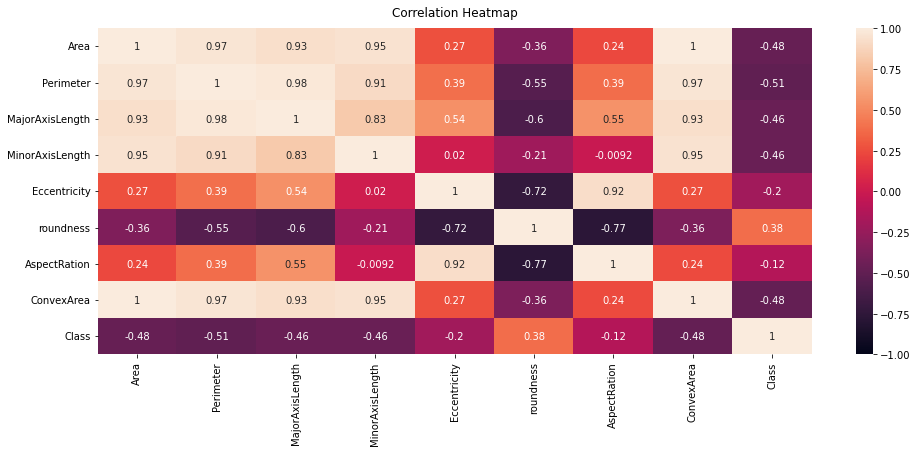

In [484]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(q2_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [485]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
q2_df.iloc[:,0:8] = scaler.fit_transform(q2_df.iloc[:,0:8])

q2_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,roundness,AspectRation,ConvexArea,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-2.185720,1.423867,-1.565053,-0.841451,5
1,-0.829188,-1.013924,-1.395911,-0.434445,-3.686040,0.231054,-1.969784,-0.826102,5
2,-0.807157,-1.078829,-1.252357,-0.585735,-2.045336,1.252865,-1.514291,-0.808704,5
3,-0.785741,-0.977215,-1.278825,-0.439290,-2.742211,0.515049,-1.741618,-0.773975,5
4,-0.781239,-1.097384,-1.380471,-0.266663,-4.535028,1.874992,-2.117993,-0.784286,5
...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,0.153343,0.727872,-0.123703,-0.378191,3
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.165141,0.818807,-0.432979,-0.378662,3
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.182940,0.758468,-0.448618,-0.376143,3
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.106960,0.581753,-0.380735,-0.372851,3


In [486]:
X = q2_df.iloc[:,:-1]
Y =  q2_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2,train_size=0.8,stratify=Y, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.25,train_size =0.75,stratify=y, random_state=5)
print(x.shape,x_test.shape,x_val.shape,x_train.shape)
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

(10888, 8) (2723, 8) (2722, 8) (8166, 8)
3    2128
6    1582
5    1216
4    1156
2     978
0     793
1     313
Name: Class, dtype: int64
3    709
6    527
5    405
4    386
2    326
0    264
1    105
Name: Class, dtype: int64
3    709
6    527
5    406
4    386
2    326
0    265
1    104
Name: Class, dtype: int64


In [487]:
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

## b

In [488]:
hidden_layer_size = 50

In [489]:
x_train.shape

(8166, 8)

In [490]:
y = y_train.reshape(1,x_train.shape[0])
y_new = np.eye(7)[y.astype('int32')]
y_new = y_new.T.reshape(7, x_train.shape[0])

In [491]:
def basic_net(n_inputs, n_outputs, initial="uniform"):
  # w1 = np.random.randn(hidden_layer_size, n_inputs)
  # b1 = np.random.randn(hidden_layer_size, 1)
  # w2 = np.random.randn(n_outputs, hidden_layer_size)
  # b2 = np.random.randn(n_outputs, 1)
  if(initial=="uniform"):
    w1 = np.random.uniform(size=(hidden_layer_size, n_inputs))
    b1 = np.random.uniform(size=(hidden_layer_size, 1))
    w2 = np.random.uniform(size=(n_outputs, hidden_layer_size))
    b2 = np.random.uniform(size=(n_outputs, 1))
    # print(w1)
  elif(initial=="zero"):
    w1 = np.zeros((hidden_layer_size, n_inputs))
    b1 = np.random.uniform(size=(hidden_layer_size, 1))
    w2 = np.zeros((n_outputs, hidden_layer_size))
    b2 = np.random.uniform(size=(n_outputs, 1))
  else:
    w1 = np.full((hidden_layer_size, n_inputs),5)
    b1 = np.random.uniform(size=(hidden_layer_size, 1))
    w2 = np.full((n_outputs, hidden_layer_size),5)
    b2 = np.random.uniform(size=(n_outputs, 1))
  return w1,b1,w2,b2

def ReLU(a):
  return np.maximum(0,a)

def der_ReLU(a):
  return (a > 0) * 1

def sigmoid(out):
  # sigm_out = 1.0 / (1.0 +exp((-1) * out))
  sigm_out = 1.0/(1.0 + np.exp(-out))
  return sigm_out

def der_sigmoid(z1):
  return sigmoid(z1) * (1 - sigmoid(z1))  

def tanh(t):
  return (np.exp(t)-np.exp(-t))/(np.exp(t)+np.exp(-t))

def der_tanh(m):
  t = tanh(m)
  return 1-t**2

def forward_prop(w1,b1,w2,b2,X,func=sigmoid):
  z1 = w1.dot(X.T) + b1
  # print("z1",X)
  # print("z1",z1.shape)
  a1 = func(z1)
  # print("a1",a1.shape)
  z2 = w2.dot(a1) + b2
  a2 = func(z2)
  # print("a2",a2.shape)
  return z1,a1,z2,a2

def back_prop(z1, a1, z2, a2, w1, w2, X, Y, func=der_sigmoid):
  # one_hot_Y = one_hot(Y)
  # print(one_hot_Y)
  m = Y.size
  # print("m",m)
  dZ2 = a2 - y_new
  # print("lol",dZ2.shape,a2.shape,y_new.shape)
  dW2 = 1 / m * np.matmul(dZ2,a1.T)
  # print("dW2",dW2)
  # print("ok",np.sum(dZ2,axis=1,keepdims=True))
  db2 = (1 / m) * np.sum(dZ2,axis=1,keepdims=True)
  # print("db2",db2)
  dZ1 = np.matmul(w2.T,(dZ2)) * func(z1)
  # print("z1",z1) 
  dW1 = (1/ m) * dZ1.dot(X)
  # print("dZ1",dZ1)
  db1 = (1/ m) * np.sum(dZ1, axis=1, keepdims=True)
  return dW1, db1, dW2, db2

In [504]:
def update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha):
    # print("hi",alpha*dW1)
    w1 = w1 - alpha * dW1
    b1 = b1 - alpha * db1    
    w2 = w2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return w1, b1, w2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, epochs):
    acc_func = []
    W1, b1, W2, b2 = basic_net(X.shape[1],7)
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        print("Epoch : ", i)
        predictions = get_predictions(A2)
        a = get_accuracy(predictions, Y)
        print(a)
        acc_func.append(a)
    return W1, b1, W2, b2, acc_func

W1, b1, W2, b2, acc_sigmoid = gradient_descent(x_train, y_train, 0.2, 400)

Epoch :  0
0.1414401175606172
Epoch :  1
0.14156257653686016
Epoch :  2
0.14156257653686016
Epoch :  3
0.14156257653686016
Epoch :  4
0.14156257653686016
Epoch :  5
0.14156257653686016
Epoch :  6
0.14156257653686016
Epoch :  7
0.1452363458241489
Epoch :  8
0.1594415870683321
Epoch :  9
0.20744550575557189
Epoch :  10
0.35464119519960813
Epoch :  11
0.4080333088415381
Epoch :  12
0.4485672299779574
Epoch :  13
0.473303943179035
Epoch :  14
0.4924075434729366
Epoch :  15
0.5072250795983345
Epoch :  16
0.5197158951751163
Epoch :  17
0.5322067107518981
Epoch :  18
0.5439627724712222
Epoch :  19
0.5614744060739653
Epoch :  20
0.5788635807004654
Epoch :  21
0.5934361988733774
Epoch :  22
0.606661768307617
Epoch :  23
0.6190301249081558
Epoch :  24
0.627234876316434
Epoch :  25
0.6355620867009552
Epoch :  26
0.6440117560617193
Epoch :  27
0.6519715895175117
Epoch :  28
0.6583394562821455
Epoch :  29
0.6639725691893216
Epoch :  30
0.6691158461915259
Epoch :  31
0.6721773205975998
Epoch :  32
0

In [505]:
def accuracy(pred,actual):
  right,wrong = 0,0
  for i in range(len(pred)):
    if(pred[i]==actual[i]):
      right+=1
    else:
      wrong+=1
  return (right*100)/(right+wrong)

In [506]:
val_x = x_val.T
val_x.shape

(8, 2722)

In [507]:
Z1 = np.matmul(W1, val_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

val_pred = np.argmax(A2, axis=0)

In [508]:
val_pred

array([6, 0, 2, ..., 5, 3, 4])

In [509]:
print("Accuracy :",accuracy(val_pred,y_val))

Accuracy : 89.16238060249816


In [510]:
test_x = x_test.T
test_x.shape

(8, 2723)

In [511]:
Z1 = np.matmul(W1, test_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

test_pred = np.argmax(A2, axis=0)

In [512]:
test_pred

array([3, 6, 3, ..., 6, 6, 5])

In [513]:
print("Accuracy :",accuracy(test_pred,y_test))

Accuracy : 90.85567388909291


## c

In [514]:
def gradient_descent1(X, Y, alpha, epochs):
    acc_func = []
    W1, b1, W2, b2 = basic_net(X.shape[1],7)
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X, ReLU)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y, der_ReLU)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        print("Epoch : ", i)
        predictions = get_predictions(A2)
        a = get_accuracy(predictions, Y)
        print(a)
        acc_func.append(a)
    return W1, b1, W2, b2, acc_func

W1, b1, W2, b2, acc_relu = gradient_descent1(x_train, y_train, 0.01, 400)

Epoch :  0
0.062331618907665934
Epoch :  1
0.1201322556943424
Epoch :  2
0.1201322556943424
Epoch :  3
0.12000979671809944
Epoch :  4
0.1201322556943424
Epoch :  5
0.12037717364682832
Epoch :  6
0.12037717364682832
Epoch :  7
0.12025471467058535
Epoch :  8
0.12025471467058535
Epoch :  9
0.12025471467058535
Epoch :  10
0.12037717364682832
Epoch :  11
0.12037717364682832
Epoch :  12
0.12037717364682832
Epoch :  13
0.12037717364682832
Epoch :  14
0.12049963262307127
Epoch :  15
0.12062209159931422
Epoch :  16
0.12062209159931422
Epoch :  17
0.12062209159931422
Epoch :  18
0.12062209159931422
Epoch :  19
0.12074455057555719
Epoch :  20
0.12098946852804311
Epoch :  21
0.12098946852804311
Epoch :  22
0.12098946852804311
Epoch :  23
0.12098946852804311
Epoch :  24
0.12098946852804311
Epoch :  25
0.12086700955180014
Epoch :  26
0.12074455057555719
Epoch :  27
0.12074455057555719
Epoch :  28
0.12074455057555719
Epoch :  29
0.12074455057555719
Epoch :  30
0.12062209159931422
Epoch :  31
0.120622

In [515]:
val_x = x_val.T

Z1 = np.matmul(W1, val_x) + b1
A1 = ReLU(Z1)
Z2 = np.matmul(W2, A1) + b2
# A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
A2 = ReLU(Z2)

val_pred = np.argmax(A2, axis=0)
val_pred

array([3, 2, 2, ..., 6, 3, 0])

In [516]:
print("Accuracy :",accuracy(val_pred,y_val))

Accuracy : 60.58045554739162


In [517]:
test_x = x_test.T

Z1 = np.matmul(W1, test_x) + b1
A1 = ReLU(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = ReLU(Z2)

test_pred = np.argmax(A2, axis=0)
test_pred

array([3, 3, 3, ..., 3, 6, 3])

In [518]:
print("Accuracy :",accuracy(test_pred,y_test))

Accuracy : 61.21924348145428


In [519]:
def gradient_descent2(X, Y, alpha, epochs):
    acc_func = []
    W1, b1, W2, b2 = basic_net(X.shape[1],7)
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X, tanh)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y, der_tanh)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        print("Epoch : ", i)
        predictions = get_predictions(A2)
        a = get_accuracy(predictions, Y)
        print(a)
        acc_func.append(a)
    return W1, b1, W2, b2, acc_func

W1, b1, W2, b2, acc_tanh = gradient_descent2(x_train, y_train, 0.01, 400)

Epoch :  0
0.13629684055841293
Epoch :  1
0.13360274308106784
Epoch :  2
0.1313984815086946
Epoch :  3
0.12907176096007839
Epoch :  4
0.12625520450649033
Epoch :  5
0.12674504041146217
Epoch :  6
0.1343374969385256
Epoch :  7
0.1552779818760715
Epoch :  8
0.18528043105559638
Epoch :  9
0.2198138623561107
Epoch :  10
0.2490815576781778
Epoch :  11
0.2599804065638011
Epoch :  12
0.26818515797207937
Epoch :  13
0.2701445015919667
Epoch :  14
0.2703894195444526
Epoch :  15
0.27026696056820965
Epoch :  16
0.26732794513837865
Epoch :  17
0.2674504041146216
Epoch :  18
0.26843007592456525
Epoch :  19
0.26965466568699487
Epoch :  20
0.27259368111682586
Epoch :  21
0.2754102375704139
Epoch :  22
0.2784717119764879
Epoch :  23
0.27969630173891746
Epoch :  24
0.2820230222875337
Epoch :  25
0.2834925300024492
Epoch :  26
0.2845946607886358
Epoch :  27
0.2845946607886358
Epoch :  28
0.2852069556698506
Epoch :  29
0.28447220181239286
Epoch :  30
0.2852069556698506
Epoch :  31
0.2842272838599069
Epoc

In [520]:
val_x = x_val.T

Z1 = np.matmul(W1, val_x) + b1
A1 = tanh(Z1)
Z2 = np.matmul(W2, A1) + b2
# A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
A2 = tanh(Z2)

val_pred = np.argmax(A2, axis=0)
val_pred

array([6, 0, 2, ..., 6, 3, 4])

In [521]:
print("Accuracy :",accuracy(val_pred,y_val))

Accuracy : 77.55326965466568


In [522]:
test_x = x_test.T

Z1 = np.matmul(W1, test_x) + b1
A1 = tanh(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = tanh(Z2)

test_pred = np.argmax(A2, axis=0)
test_pred

array([3, 6, 3, ..., 6, 6, 3])

In [523]:
print("Accuracy :",accuracy(test_pred,y_test))

Accuracy : 79.65479250826294


In [524]:
acc_sigmoid

[0.1414401175606172,
 0.14156257653686016,
 0.14156257653686016,
 0.14156257653686016,
 0.14156257653686016,
 0.14156257653686016,
 0.14156257653686016,
 0.1452363458241489,
 0.1594415870683321,
 0.20744550575557189,
 0.35464119519960813,
 0.4080333088415381,
 0.4485672299779574,
 0.473303943179035,
 0.4924075434729366,
 0.5072250795983345,
 0.5197158951751163,
 0.5322067107518981,
 0.5439627724712222,
 0.5614744060739653,
 0.5788635807004654,
 0.5934361988733774,
 0.606661768307617,
 0.6190301249081558,
 0.627234876316434,
 0.6355620867009552,
 0.6440117560617193,
 0.6519715895175117,
 0.6583394562821455,
 0.6639725691893216,
 0.6691158461915259,
 0.6721773205975998,
 0.6760960078373744,
 0.6791574822434484,
 0.6820964976732794,
 0.6858927259368112,
 0.6888317413666422,
 0.6911584619152584,
 0.692505510653931,
 0.695077149155033,
 0.6974038697036493,
 0.6992407543472936,
 0.700955180014695,
 0.7031594415870683,
 0.7058535390644134,
 0.7083027185892726,
 0.7106294391378888,
 0.71271124

In [525]:
acc_tanh

[0.13629684055841293,
 0.13360274308106784,
 0.1313984815086946,
 0.12907176096007839,
 0.12625520450649033,
 0.12674504041146217,
 0.1343374969385256,
 0.1552779818760715,
 0.18528043105559638,
 0.2198138623561107,
 0.2490815576781778,
 0.2599804065638011,
 0.26818515797207937,
 0.2701445015919667,
 0.2703894195444526,
 0.27026696056820965,
 0.26732794513837865,
 0.2674504041146216,
 0.26843007592456525,
 0.26965466568699487,
 0.27259368111682586,
 0.2754102375704139,
 0.2784717119764879,
 0.27969630173891746,
 0.2820230222875337,
 0.2834925300024492,
 0.2845946607886358,
 0.2845946607886358,
 0.2852069556698506,
 0.28447220181239286,
 0.2852069556698506,
 0.2842272838599069,
 0.2843497428361499,
 0.28447220181239286,
 0.2843497428361499,
 0.28532941464609357,
 0.28557433259857945,
 0.2858192505510654,
 0.28655400440852313,
 0.2871662992897379,
 0.28826843007592456,
 0.28863580700465347,
 0.2890031839333823,
 0.289982855743326,
 0.29071760960078374,
 0.2910849865295126,
 0.29047269164

In [526]:
acc_relu

[0.062331618907665934,
 0.1201322556943424,
 0.1201322556943424,
 0.12000979671809944,
 0.1201322556943424,
 0.12037717364682832,
 0.12037717364682832,
 0.12025471467058535,
 0.12025471467058535,
 0.12025471467058535,
 0.12037717364682832,
 0.12037717364682832,
 0.12037717364682832,
 0.12037717364682832,
 0.12049963262307127,
 0.12062209159931422,
 0.12062209159931422,
 0.12062209159931422,
 0.12062209159931422,
 0.12074455057555719,
 0.12098946852804311,
 0.12098946852804311,
 0.12098946852804311,
 0.12098946852804311,
 0.12098946852804311,
 0.12086700955180014,
 0.12074455057555719,
 0.12074455057555719,
 0.12074455057555719,
 0.12074455057555719,
 0.12062209159931422,
 0.12062209159931422,
 0.12062209159931422,
 0.12062209159931422,
 0.12037717364682832,
 0.12037717364682832,
 0.12025471467058535,
 0.12000979671809944,
 0.12037717364682832,
 0.12086700955180014,
 0.12123438648052902,
 0.12135684545677199,
 0.12405094293411707,
 0.12674504041146217,
 0.12894930198383542,
 0.130173891

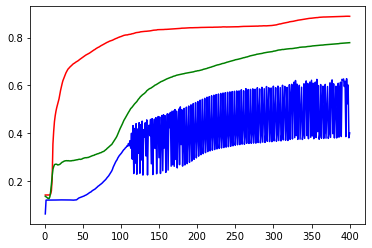

In [527]:
x_coordinates = [i for i in range(1,401)]

plt.plot(x_coordinates, acc_sigmoid, "r") # plot first line
plt.plot(x_coordinates, acc_relu, "b") # plot second line
plt.plot(x_coordinates, acc_tanh, "g") # plot third line

## d

In [528]:
def gradient_descent(X, Y, alpha, epochs):
    acc_func = []
    W1, b1, W2, b2 = basic_net(X.shape[1],7, "uniform")
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        print("Epoch : ", i)
        predictions = get_predictions(A2)
        a = get_accuracy(predictions, Y)
        print(a)
        acc_func.append(a)
    return W1, b1, W2, b2, acc_func

W1, b1, W2, b2, acc_uni = gradient_descent(x_train, y_train, 0.1, 400)

Epoch :  0
0.30014695077149156
Epoch :  1
0.2991672789615479
Epoch :  2
0.2967180994366887
Epoch :  3
0.28863580700465347
Epoch :  4
0.2834925300024492
Epoch :  5
0.29500367376928727
Epoch :  6
0.3471711976487877
Epoch :  7
0.31496448689688955
Epoch :  8
0.30173891746265
Epoch :  9
0.29157482243448446
Epoch :  10
0.2761449914278717
Epoch :  11
0.25642909625275534
Epoch :  12
0.25495958853783984
Epoch :  13
0.27026696056820965
Epoch :  14
0.3201077638990938
Epoch :  15
0.3886847905951506
Epoch :  16
0.39039921626255203
Epoch :  17
0.3923585598824394
Epoch :  18
0.39505265735978445
Epoch :  19
0.40068577026696056
Epoch :  20
0.40901298065148173
Epoch :  21
0.4186872397746755
Epoch :  22
0.4266470732304678
Epoch :  23
0.43693362723487633
Epoch :  24
0.44599559147685525
Epoch :  25
0.45726181729120746
Epoch :  26
0.4699975508204751
Epoch :  27
0.4789370560862111
Epoch :  28
0.48628459466078866
Epoch :  29
0.4981631153563556
Epoch :  30
0.5063678667646339
Epoch :  31
0.5165319617927994
Epoc

In [529]:
val_x = x_val.T

Z1 = np.matmul(W1, val_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
# A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
A2 = sigmoid(Z2)

val_pred = np.argmax(A2, axis=0)
val_pred

array([6, 0, 2, ..., 5, 3, 4])

In [530]:
print("Accuracy :",accuracy(val_pred,y_val))

Accuracy : 84.97428361498898


In [531]:
test_x = x_test.T

Z1 = np.matmul(W1, test_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

test_pred = np.argmax(A2, axis=0)
test_pred

array([3, 6, 3, ..., 6, 6, 5])

In [532]:
print("Accuracy :",accuracy(test_pred,y_test))

Accuracy : 85.01652589056188


In [533]:
def gradient_descent(X, Y, alpha, epochs):
    acc_func = []
    W1, b1, W2, b2 = basic_net(X.shape[1],7, "zero")
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        print("Epoch : ", i)
        predictions = get_predictions(A2)
        a = get_accuracy(predictions, Y)
        print(a)
        acc_func.append(a)
    return W1, b1, W2, b2, acc_func

W1, b1, W2, b2, acc_zero = gradient_descent(x_train, y_train, 0.1, 400)

Epoch :  0
0.19373010041636052
Epoch :  1
0.19373010041636052
Epoch :  2
0.2605927014450159
Epoch :  3
0.2605927014450159
Epoch :  4
0.2605927014450159
Epoch :  5
0.2605927014450159
Epoch :  6
0.2605927014450159
Epoch :  7
0.2605927014450159
Epoch :  8
0.2605927014450159
Epoch :  9
0.2605927014450159
Epoch :  10
0.2605927014450159
Epoch :  11
0.2605927014450159
Epoch :  12
0.2605927014450159
Epoch :  13
0.2605927014450159
Epoch :  14
0.2605927014450159
Epoch :  15
0.2605927014450159
Epoch :  16
0.2605927014450159
Epoch :  17
0.2605927014450159
Epoch :  18
0.2605927014450159
Epoch :  19
0.2605927014450159
Epoch :  20
0.2605927014450159
Epoch :  21
0.2605927014450159
Epoch :  22
0.2605927014450159
Epoch :  23
0.2605927014450159
Epoch :  24
0.2605927014450159
Epoch :  25
0.2605927014450159
Epoch :  26
0.2605927014450159
Epoch :  27
0.2605927014450159
Epoch :  28
0.2605927014450159
Epoch :  29
0.2605927014450159
Epoch :  30
0.2605927014450159
Epoch :  31
0.2605927014450159
Epoch :  32
0.26

In [534]:
val_x = x_val.T

Z1 = np.matmul(W1, val_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
# A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
A2 = sigmoid(Z2)

val_pred = np.argmax(A2, axis=0)
val_pred

array([3, 4, 4, ..., 3, 3, 6])

In [535]:
print("Accuracy :",accuracy(val_pred,y_val))

Accuracy : 42.57898603967671


In [536]:
test_x = x_test.T

Z1 = np.matmul(W1, test_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

test_pred = np.argmax(A2, axis=0)
test_pred

array([3, 3, 3, ..., 3, 3, 3])

In [537]:
print("Accuracy :",accuracy(test_pred,y_test))

Accuracy : 43.55490268086669


In [538]:
def gradient_descent(X, Y, alpha, epochs):
    acc_func = []
    W1, b1, W2, b2 = basic_net(X.shape[1],7, "constant")
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        print("Epoch : ", i)
        predictions = get_predictions(A2)
        a = get_accuracy(predictions, Y)
        print(a)
        acc_func.append(a)
    return W1, b1, W2, b2, acc_func

W1, b1, W2, b2, acc_const = gradient_descent(x_train, y_train, 0.1, 400)

Epoch :  0
0.09662013225569434
Epoch :  1
0.09637521430320843
Epoch :  2
0.09649767327945138
Epoch :  3
0.09649767327945138
Epoch :  4
0.09686505020818026
Epoch :  5
0.09698750918442321
Epoch :  6
0.09723242713690913
Epoch :  7
0.09710996816066618
Epoch :  8
0.09723242713690913
Epoch :  9
0.09723242713690913
Epoch :  10
0.0973548861131521
Epoch :  11
0.09747734508939505
Epoch :  12
0.09772226304188097
Epoch :  13
0.09772226304188097
Epoch :  14
0.09784472201812393
Epoch :  15
0.09796718099436688
Epoch :  16
0.09772226304188097
Epoch :  17
0.09772226304188097
Epoch :  18
0.09759980406563801
Epoch :  19
0.09759980406563801
Epoch :  20
0.09784472201812393
Epoch :  21
0.35023267205486164
Epoch :  22
0.35133480284104823
Epoch :  23
0.35133480284104823
Epoch :  24
0.35170217976977713
Epoch :  25
0.35170217976977713
Epoch :  26
0.3518246387460201
Epoch :  27
0.3518246387460201
Epoch :  28
0.35170217976977713
Epoch :  29
0.35170217976977713
Epoch :  30
0.35170217976977713
Epoch :  31
0.3513348

In [539]:
val_x = x_val.T

Z1 = np.matmul(W1, val_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
# A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
A2 = sigmoid(Z2)

val_pred = np.argmax(A2, axis=0)
val_pred

array([3, 4, 2, ..., 3, 3, 3])

In [540]:
print("Accuracy :",accuracy(val_pred,y_val))

Accuracy : 43.16678912564291


In [541]:
test_x = x_test.T

Z1 = np.matmul(W1, test_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

test_pred = np.argmax(A2, axis=0)
test_pred

array([3, 3, 3, ..., 3, 3, 3])

In [542]:
print("Accuracy :",accuracy(test_pred,y_test))

Accuracy : 43.77524788835843


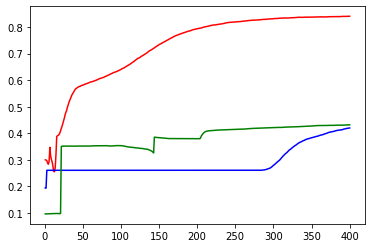

In [543]:
x_coordinates = [i for i in range(1,401)]

plt.plot(x_coordinates, acc_uni, "r") # plot first line
plt.plot(x_coordinates, acc_zero, "b") # plot second line
plt.plot(x_coordinates, acc_const, "g") # plot third line

## e

In [544]:
hidden_layer_size = 100

In [545]:
acc_50 = acc_sigmoid

In [546]:
W1, b1, W2, b2, acc_100 = gradient_descent(x_train, y_train, 0.1, 400)

Epoch :  0
0.3496203771736468
Epoch :  1
0.3496203771736468
Epoch :  2
0.3496203771736468
Epoch :  3
0.3494979181974039
Epoch :  4
0.3494979181974039
Epoch :  5
0.34974283614988977
Epoch :  6
0.3496203771736468
Epoch :  7
0.3499877541023757
Epoch :  8
0.35023267205486164
Epoch :  9
0.3503551310311046
Epoch :  10
0.3503551310311046
Epoch :  11
0.3503551310311046
Epoch :  12
0.3506000489835905
Epoch :  13
0.35072250795983345
Epoch :  14
0.35072250795983345
Epoch :  15
0.35072250795983345
Epoch :  16
0.35121234386480527
Epoch :  17
0.35121234386480527
Epoch :  18
0.35170217976977713
Epoch :  19
0.35157972079353417
Epoch :  20
0.35108988488856235
Epoch :  21
0.35108988488856235
Epoch :  22
0.35072250795983345
Epoch :  23
0.3509674259123194
Epoch :  24
0.35072250795983345
Epoch :  25
0.3506000489835905
Epoch :  26
0.3504775900073475
Epoch :  27
0.3504775900073475
Epoch :  28
0.3504775900073475
Epoch :  29
0.3506000489835905
Epoch :  30
0.3508449669360764
Epoch :  31
0.3508449669360764
Epoch

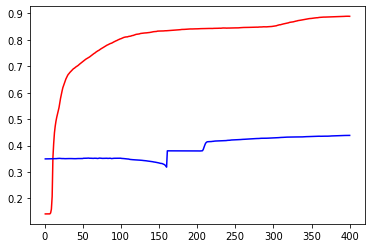

In [547]:
x_coordinates = [i for i in range(1,401)]

plt.plot(x_coordinates, acc_50, "r") # plot first line
plt.plot(x_coordinates, acc_100, "b") # plot second line

In [548]:
val_x = x_val.T

Z1 = np.matmul(W1, val_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
# A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
A2 = sigmoid(Z2)

val_pred = np.argmax(A2, axis=0)
val_pred

array([3, 4, 2, ..., 3, 3, 3])

In [549]:
print("Accuracy :",accuracy(val_pred,y_val))

Accuracy : 43.93828067597355


In [550]:
test_x = x_test.T

Z1 = np.matmul(W1, test_x) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

test_pred = np.argmax(A2, axis=0)
test_pred

array([3, 3, 3, ..., 3, 3, 3])

In [551]:
print("Accuracy :",accuracy(test_pred,y_test))

Accuracy : 44.36283510833639


## f

In [552]:
# Models are saved in pytorch using torch.save(model,'PATH').
# Models are loaded using model = torch.load('PATH').